<a href="https://colab.research.google.com/github/yinglingyang/Data-Science-with-Python/blob/main/Classification_Models_For_Predicting_Rain_In_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Models For Predicting Rain In Australia

## 1 Introduction

**Objective：**

*   Build classification models to predict weather in Australia
*   Evaluate classification models and find the best result
*   Examine the predictive power of features

**Machine learning Models used in this project:**

*   Logistic Regression
*   K Nearest Neighbor
*   Support Vector Machine
*   Decision Tree
*   Random Forest
*   Gradient Boosting

**Dataset:** https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

The Kaggle dataset (145460 rows and 23 columns) contains about 10 years of daily weather observations drawn from numerous weather stations across Australia. RainTomorrow is the target variable to predict and other columns are the feature variables. 



## 2 Load Data and Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/weatherAUS.csv")

## 3 Data Description and Exploration

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
count = df['RainTomorrow'].value_counts()
count

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

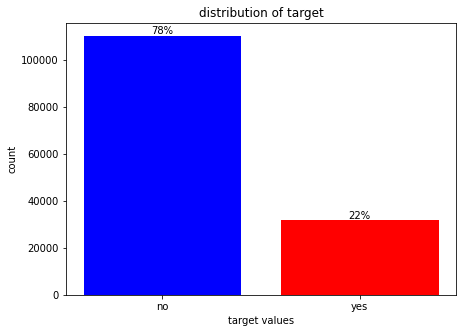

In [ ]:
plt.figure(figsize = (7,5))
graph = plt.bar(['no', 'yes'], count.values, color=['blue', 'red'])
plt.title('distribution of target')
plt.title('distribution of target')
plt.xlabel('target values')
plt.ylabel('count')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01+1,
             str(round(100*count[i]/df["RainTomorrow"].count()))+'%',
             ha='center')
    i += 1

plt.show()

Conclusion: 78% target is 'no', and 22% target is 'yes'. It is an imbalanced dataset.

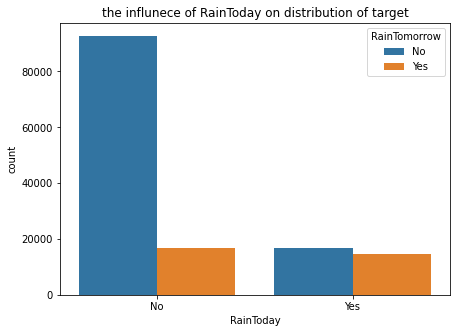

In [ ]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'RainToday', hue = 'RainTomorrow', data = df)
plt.title('the influnece of RainToday on distribution of target')
plt.show()

Finding: There is a obvious relationship between 'RainToday' and the tagret. If 'RainToday' is no, it is more possible that 'RainTomorrow' is also no.

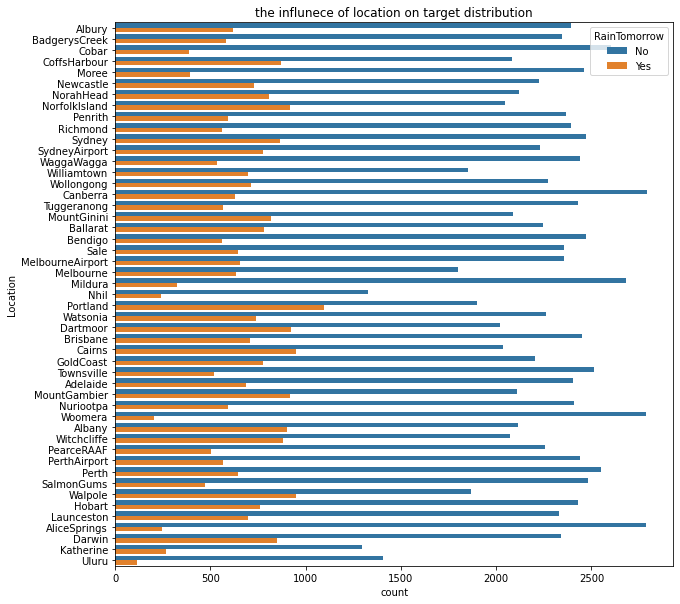

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'Location',hue = 'RainTomorrow', data = df)
plt.title('the influnece of location on target distribution')
plt.show()

Finding: Location has a significant influence on the target. The target distribution is different at different location.

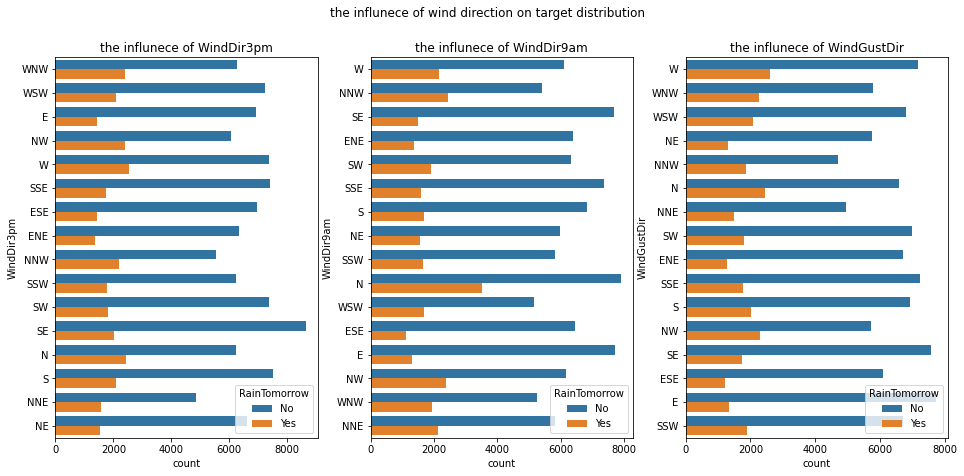

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 7))
sns.countplot(y = 'WindDir3pm',hue = 'RainTomorrow', data = df, ax = ax1)
ax1.set(title='the influnece of WindDir3pm')
sns.countplot(y = 'WindDir9am',hue = 'RainTomorrow', data = df, ax = ax2)
ax2.set(title='the influnece of WindDir9am')
sns.countplot(y = 'WindGustDir',hue = 'RainTomorrow', data = df, ax = ax3)
ax3.set(title='the influnece of WindGustDir')
fig.suptitle("the influnece of wind direction on target distribution")
plt.show()

Finding: Wind direction can affect the rain possibility of tomorrow. When WindGustDir is WNW, the rain possibility of tomorrow is a little higher. When WindGustDir is E, the rain possibility of tomorrow is a litter lower.

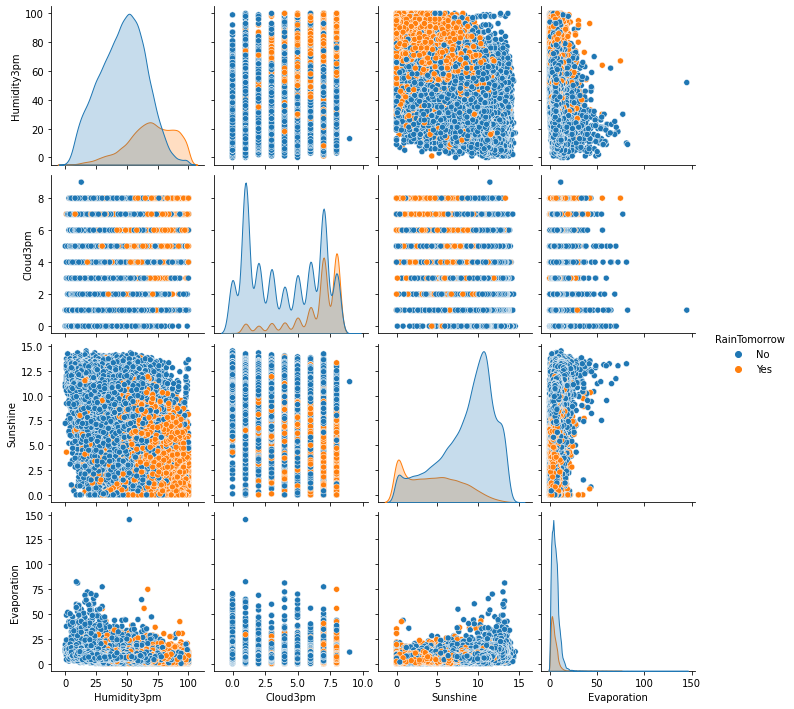

In [ ]:
sns.pairplot(df[['Humidity3pm','Cloud3pm','Sunshine', 'Evaporation', 'RainTomorrow']], hue='RainTomorrow')

Finding: The pairplots also show strong relationship between the target and some features (Humidity3pm, Cloud3pm, Sunshine and Evaporation). It is more possible to rain on high humidity and more clouds, and it is less possible when sunshine and evaporation is high.

## 4 Data Cleaning and Feature Engineering

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df.drop("Date", axis = 1, inplace = True)

In [ ]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(56420, 25)

In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == "O"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
79200,23,7.2,15.9,27.6,2.4,3.2,13,33.0,14,12,11.0,17.0,89.0,84.0,1013.8,1014.7,6.0,7.0,11.2,12.8,1,1,2012,5,26
106188,25,7.3,18.4,0.0,4.8,11.6,10,44.0,10,10,26.0,30.0,64.0,39.0,1028.0,1025.2,5.0,2.0,11.3,16.8,0,0,2010,9,19
101261,12,11.5,19.1,0.0,6.6,3.6,13,41.0,14,13,26.0,26.0,63.0,61.0,1013.4,1013.1,7.0,7.0,14.7,17.7,0,1,2013,12,12
45718,3,13.9,34.7,0.0,6.4,8.5,11,46.0,9,1,11.0,7.0,50.0,18.0,1022.8,1019.3,0.0,3.0,20.2,32.7,0,0,2008,3,11
32556,19,17.7,23.5,0.0,6.0,3.8,5,67.0,2,4,15.0,30.0,67.0,75.0,1017.1,1012.6,7.0,7.0,20.7,21.0,0,1,2014,11,5
62303,18,14.8,32.2,0.0,6.6,8.5,7,41.0,6,1,2.0,15.0,67.0,42.0,1014.5,1011.5,5.0,5.0,22.9,31.2,0,0,2012,2,26
62385,18,3.2,17.4,0.0,2.2,4.9,7,30.0,7,6,7.0,20.0,84.0,53.0,1023.3,1019.9,6.0,7.0,8.8,16.6,0,0,2012,5,18
139980,6,23.3,33.7,12.2,7.0,2.6,8,59.0,10,15,7.0,6.0,83.0,95.0,1009.3,1007.6,7.0,8.0,29.0,24.6,1,1,2010,11,17
121135,15,17.4,29.9,0.0,6.4,10.7,13,31.0,15,15,2.0,17.0,49.0,42.0,1008.0,1007.6,6.0,4.0,26.7,26.6,0,0,2009,11,10
141393,6,26.9,33.6,0.0,5.4,3.9,7,28.0,2,14,11.0,19.0,79.0,56.0,1008.3,1004.9,8.0,7.0,29.1,33.1,0,0,2014,12,28


In [ ]:
target = 'RainTomorrow'
features = [col for col in df.columns if col != target]

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(df[features], df[target])

In [ ]:
X.shape

(87986, 24)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

## 5 Data Training and Modeling

### 5.1 Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

Cs_list = [0.01,0.1,1,10,100,1000,10000]
lr_accuracy_list = []

for c in Cs_list:
  lr = LogisticRegression(penalty='l2',C=c, solver='liblinear', max_iter=10000)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  lr_accuracy_list.append((c, accuracy))

In [ ]:
accuracy_df = pd.DataFrame(lr_accuracy_list, columns=['C', 'Accuracy'])

print("best C:", accuracy_df.loc[accuracy_df['Accuracy'].idxmax(), 'C'])
print("best accuracy:", round(accuracy_df['Accuracy'].max(),3))

best C: 100.0
best accuracy: 0.804


Text(0.5, 1.0, 'Logistic Regression Accuracy')

<Figure size 432x288 with 0 Axes>

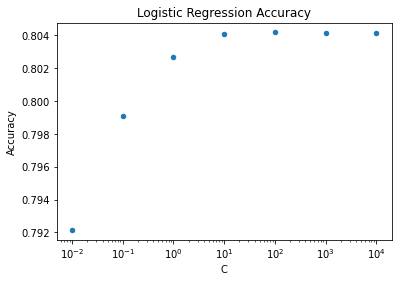

In [ ]:
plt.figure()
ax = accuracy_df.plot(x='C', y='Accuracy', logx=True, kind='scatter')
ax.set(xlabel='C', ylabel='Accuracy')
plt.title('Logistic Regression Accuracy')

### 5.2 K-Nearest Neighbor 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

max_k = 20
knn_accuracy_list = list() 

for k in range(1, max_k, 2):   
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracy_list.append((k,accuracy))

In [ ]:
accuracy_df = pd.DataFrame(knn_accuracy_list, columns=['K', 'Accuracy'])

print("best K:", accuracy_df.loc[accuracy_df['Accuracy'].idxmax(), 'K'])
print("best accuracy:", round(accuracy_df['Accuracy'].max(),3))

best K: 1
best accuracy: 0.888


Text(0.5, 1.0, 'KNN Accuracy')

<Figure size 432x288 with 0 Axes>

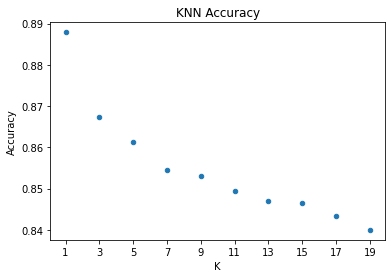

In [ ]:
plt.figure()
ax = accuracy_df.plot(x='K', y='Accuracy', kind='scatter')
ax.set(xlabel='K', ylabel='Accuracy')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN Accuracy')

### 5.3 Support Vector Machines

In [ ]:
from sklearn.svm import SVC

c_list = [0.01,0.1,1,10,100]
svm_accuracy_list = []

for c in c_list:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    svm_accuracy_list.append((c,accuracy))

In [ ]:
accuracy_df = pd.DataFrame(svm_accuracy_list, columns=['C', 'Accuracy'])

print("best C:", accuracy_df.loc[accuracy_df['Accuracy'].idxmax(), 'C'])
print("best accuracy:", round(accuracy_df['Accuracy'].max(),3))

best C: 10.0
best accuracy: 0.805


Text(0.5, 1.0, 'SVM Accuracy')

<Figure size 432x288 with 0 Axes>

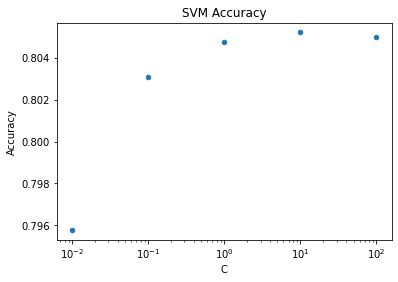

In [ ]:
plt.figure()
ax = accuracy_df.plot(x='C', y='Accuracy', logx=True, kind='scatter')
ax.set(xlabel='C', ylabel='Accuracy')
plt.title('SVM Accuracy')

### 5.4 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_depth = np.arange(1,40)
dt_accuracy_list = []

for depth in max_depth:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt = dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  dt_accuracy_list.append((depth, accuracy))

In [ ]:
accuracy_df = pd.DataFrame(dt_accuracy_list, columns=['Max_depth', 'Accuracy'])

print("best max depth:", accuracy_df.loc[accuracy_df['Accuracy'].idxmax(), 'Max_depth'])
print("best accuracy:", round(accuracy_df['Accuracy'].max(),3))

best max depth: 19
best accuracy: 0.85


Text(0.5, 1.0, 'Decision Tree Accuracy')

<Figure size 432x288 with 0 Axes>

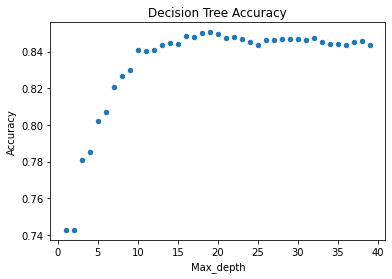

In [ ]:
plt.figure()
ax = accuracy_df.plot(x='Max_depth', y='Accuracy', kind='scatter')
ax.set(xlabel='Max_depth', ylabel='Accuracy')
plt.title('Decision Tree Accuracy')

### 5.5 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

rf_accuracy_list = []
tree_n_list = [50, 100, 200, 400, 800, 1600, 3200]

for n in tree_n_list:
  rf.set_params(n_estimators=n)
  rf = rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  rf_accuracy_list.append((n, accuracy))

In [ ]:
accuracy_df = pd.DataFrame(rf_accuracy_list, columns=['Tree_num', 'Accuracy'])

print("best tree_num:", accuracy_df.loc[accuracy_df['Accuracy'].idxmax(), 'Tree_num'])
print("best accuracy:", round(accuracy_df['Accuracy'].max(),3))

best tree_num: 1600
best accuracy: 0.919


Text(0.5, 1.0, 'Random Forest Accuracy')

<Figure size 432x288 with 0 Axes>

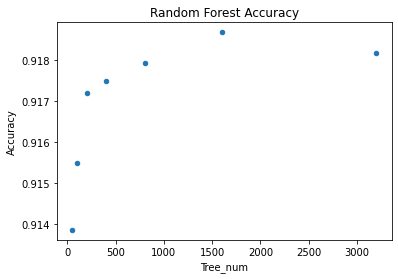

In [ ]:
plt.figure()
ax = accuracy_df.plot(x='Tree_num', y='Accuracy', kind='scatter')
ax.set(xlabel='Tree_num', ylabel='Accuracy')
plt.title('Random Forest Accuracy')

### 5.6 Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_accuracy_list = []
boosting_stages_n = [50, 100, 200, 400, 800, 1600, 3200]

for n in boosting_stages_n:
  gb = GradientBoostingClassifier(n_estimators=n)
  gb = gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  gb_accuracy_list.append((n, accuracy))


In [ ]:
accuracy_df = pd.DataFrame(gb_accuracy_list, columns=['Boosting_Stages_Num', 'Accuracy'])

print("best boosting_stages_n:", accuracy_df.loc[accuracy_df['Accuracy'].idxmax(), 'Boosting_Stages_Num'])
print("best accuracy:", round(accuracy_df['Accuracy'].max(),3))

best boosting_stages_n: 1600
best accuracy: 0.916


Text(0.5, 1.0, 'RGradientBoosting Accuracy')

<Figure size 432x288 with 0 Axes>

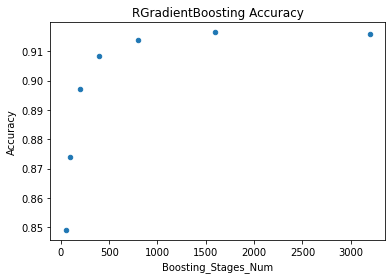

In [ ]:
plt.figure()
ax = accuracy_df.plot(x='Boosting_Stages_Num', y='Accuracy', kind='scatter')
ax.set(xlabel='Boosting_Stages_Num', ylabel='Accuracy')
plt.title('RGradientBoosting Accuracy')

## 6 Comparison of Model Performance

In [ ]:
model_results = [('Logistic Regression', 0.804),
                 ('K-Nearest Neighbor', 0.888),
                 ('Support Vector Machines', 0.805),
                 ('Decision Tree', 0.85),
                 ('Random Forest', 0.919),
                 ('Gradient Boosting', 0.916)]

model_df = pd.DataFrame(model_results, columns=['Model', 'Accuracy'])

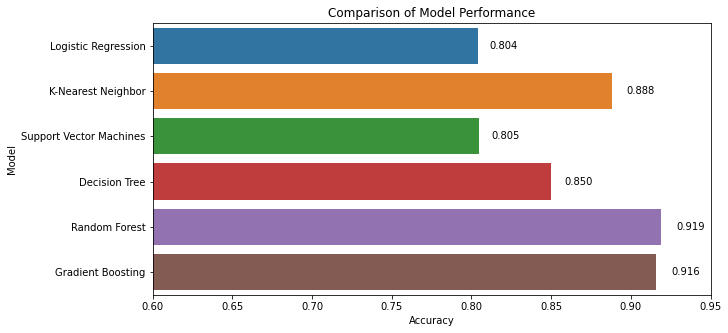

In [ ]:
plt.figure(figsize= (10,5))
ax = sns.barplot(y="Model", x="Accuracy", data=model_df)
ax.set_xlim(0.60,0.95)
ax.set_title('Comparison of Model Performance')
for bar in ax.patches:   
    width = bar.get_width()
    plt.text(1.02*bar.get_width(), bar.get_y()+0.5*bar.get_height(),
                 '%.3f' % width,
                 ha='center', va='center')
plt.show()

## 7 Confusion_Matrix and Feature Importance

In [ ]:
best_rf = RandomForestClassifier(n_estimators=1600,
                                 oob_score=True, 
                                 random_state=42, 
                                 warm_start=True,
                                 n_jobs=-1)

In [ ]:
best_rf = best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      8803
           1       0.90      0.94      0.92      8795

    accuracy                           0.92     17598
   macro avg       0.92      0.92      0.92     17598
weighted avg       0.92      0.92      0.92     17598



Text(0.5, 33.0, 'Confusion Matrix')

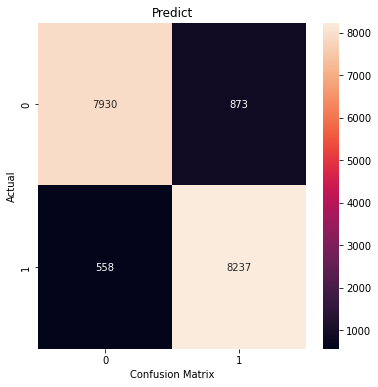

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Predict')
plt.ylabel('Actual')
plt.xlabel('Confusion Matrix')

In [ ]:
pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

Sunshine         0.127507
Humidity3pm      0.124176
Cloud3pm         0.103153
Rainfall         0.072502
Cloud9am         0.062825
Pressure3pm      0.048997
WindGustSpeed    0.048670
Pressure9am      0.043839
Humidity9am      0.040260
Evaporation      0.028007
MinTemp          0.027576
Temp3pm          0.027308
Temp9am          0.026254
MaxTemp          0.025622
WindSpeed3pm     0.025295
WindSpeed9am     0.024309
day              0.021500
Location         0.021135
WindDir3pm       0.020422
WindDir9am       0.020364
WindGustDir      0.018408
month            0.017624
year             0.015672
RainToday        0.008577
dtype: float64

Finding: The most important features are Sunshine, Humidity3pm, Cloud3pm 


##Summary of Training:

*   The accuracy of Logistic Regression is close to SVM (about 0.80), and Logistic Regression is much faster. 
*   The accuracy of Decision Tree is close to KNN (about 0.85), and Decision Tree is faster.
*   The accuracy of Random Forest is close to Gradient Boosting (about 0.92), and Random Forest is faster.

**The most accurate and fastest model is Random Forest.**
